# 导包 - 数据处理

In [348]:
# import package
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [349]:
# load
data = np.loadtxt("./data1/one_variable.txt", delimiter="\t")
X = data[:, 0].reshape(-1, 1).astype(np.float32)
y = data[:, 1].reshape(-1, 1).astype(np.float32)

In [350]:
print("数据前 5 行：")
print(data[:5])

数据前 5 行：
[[0.120431 0.136129]
 [0.676309 0.302893]
 [0.765958 0.329787]
 [0.043579 0.113074]
 [0.591529 0.277459]]


In [351]:
print("数据形状：")
print(f"X 的形状: {X.shape}")
print(f"y 的形状: {y.shape}")

数据形状：
X 的形状: (200, 1)
y 的形状: (200, 1)


In [352]:
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)

# 模型搭建 - 初始化 - 训练

In [353]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  

    def forward(self, x):
        return self.linear(x)

# init
model = LinearRegressionModel()
criterion = nn.MSELoss()  
optimizer = optim.SGD(model.parameters(), lr=0.1) 

In [354]:
# 训练模型
num_epochs = 1000 
losses = []  # 用于记录损失值
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)  

    # 反向传播和优化
    optimizer.zero_grad() 
    loss.backward()  
    optimizer.step()  

    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.0035
Epoch [200/1000], Loss: 0.0002
Epoch [300/1000], Loss: 0.0000
Epoch [400/1000], Loss: 0.0000
Epoch [500/1000], Loss: 0.0000
Epoch [600/1000], Loss: 0.0000
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000


# 损失图

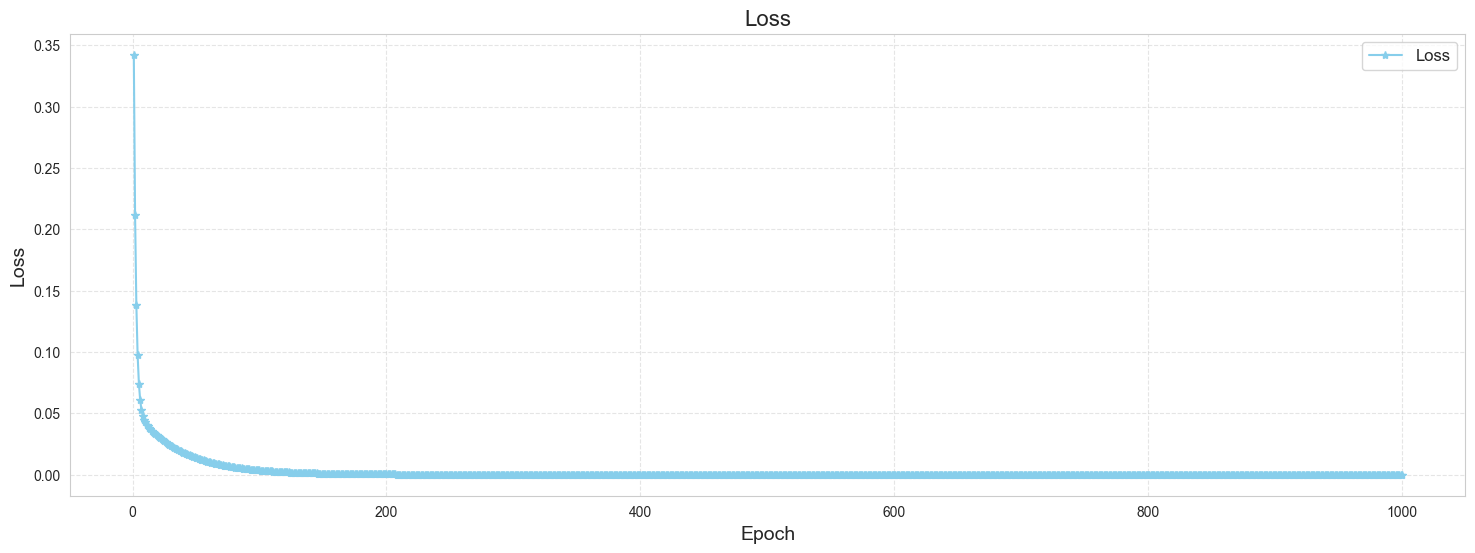

In [355]:
plt.figure(figsize=(18, 6))
plt.plot(range(1, num_epochs + 1), losses, label='Loss', color='skyblue', marker='*', linestyle='-')
plt.title("Loss", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 线性方程

In [356]:
# 模型参数
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

slope = model.linear.weight.item()  
intercept = model.linear.bias.item()  

print(f"Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")

linear.weight tensor([[0.3000]])
linear.bias tensor([0.1000])
Linear Regression Equation: y = 0.30x + 0.10


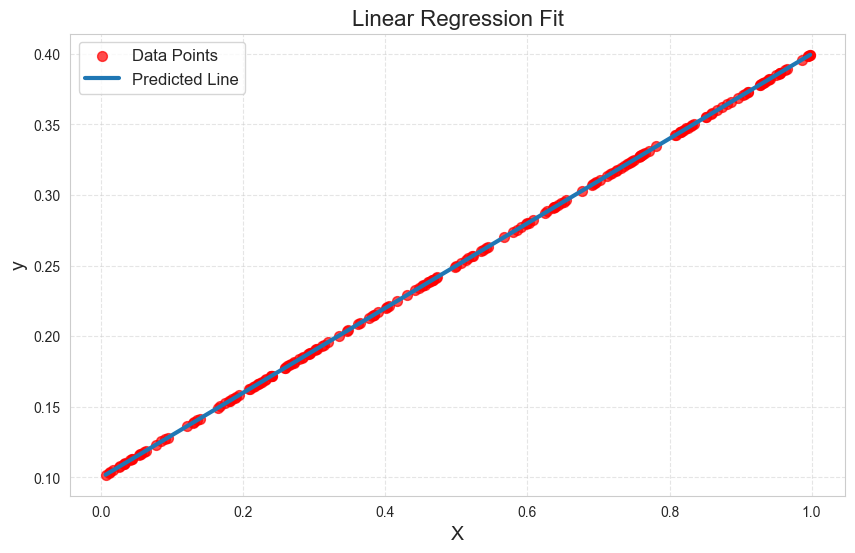

In [357]:
# 将数据转换为 Pandas DataFrame
data_df = pd.DataFrame(data, columns=["X", "y"])

X_flat = X.flatten()
sorted_indices = np.argsort(X_flat)
X_sorted = X_flat[sorted_indices]
y_pred = model(torch.from_numpy(X_sorted.reshape(-1, 1))).detach().numpy()

plt.figure(figsize=(10, 6))
plt.scatter(data_df["X"], data_df["y"], label="Data Points",color="red", s=50, alpha=0.7)
plt.plot(X_sorted, y_pred, lw=3, label="Predicted Line")
plt.title("Linear Regression Fit", fontsize=16)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

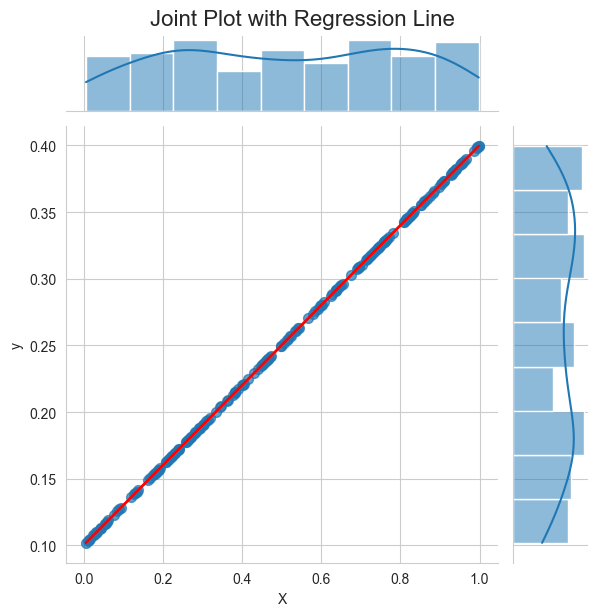

In [358]:
# 使用 Seaborn 的 JointPlot 双变量分布
sns.jointplot(x="X", y="y", data=data_df, kind="reg",
              joint_kws={"scatter_kws": {"s": 50, "alpha": 0.7}, "line_kws": {"color": "red", "lw": 2}})
plt.suptitle("Joint Plot with Regression Line", y=1.02, fontsize=16)
plt.show()

In [359]:
import numpy as np

with open('data1/one_variable.txt', 'r') as f:
    data = f.readlines()

X = []
y = []
for line in data:
    x, yi = line.strip().split('\t')
    X.append(float(x))
    y.append(float(yi))

X = np.array(X)
y = np.array(y)

In [360]:
# 计算线性回归系数
n = len(X)
X_mean = np.mean(X)
y_mean = np.mean(y)

# 计算分子和分母
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)

# 计算斜率和截距
b = numerator / denominator
a = y_mean - b * X_mean

# 输出线性回归方程
equation = f'y = {a:.4f} + {b:.4f}x'
print("方程为：", equation)

方程为： y = 0.1000 + 0.3000x
